In [66]:
import numpy as np
import pandas as pd
from typing import *
import sys
sys.path.append('/Users/emicatx/Downloads/CMOR_438_FALL_2025_Emilia/src')
from rice_ml.preprocess.datatype import *

In [67]:
ArrayLike = Union[np.ndarray, Sequence[float], Sequence[Sequence[float]], pd.DataFrame, pd.Series]

def _ensure_numeric(data_vector: ArrayLike, name: str = 'Data') -> np.ndarray:

    # TODO: docstrings, type hints, and examples

    vector = _1D_vectorized(data_vector, name)
    
    if not np.issubdtype(vector.dtype, np.number):
        try:
            vector = vector.astype(float, copy = False)
        except (TypeError, ValueError) as e:
            raise TypeError(f'All entries in {name} must be numeric') from e
    else:
        vector = vector.astype(float, copy = False)

    return vector

In [68]:
test_array = np.array([True, False, True, False])
_ensure_numeric(test_array)

array([1., 0., 1., 0.])

In [69]:
x = [1, 1, 1]
_1D_vectorized(x, 'x')

array([1, 1, 1])

In [70]:
def euclidean_distance(data_vector_1: ArrayLike, 
                       data_vector_2: ArrayLike, 
                       name_1: str = 'data_vector_1', 
                       name_2: str = 'data_vector_2') -> float:
    
    # TODO: docstrings, type hints, and examples

    vector_1 = _ensure_numeric(data_vector_1, name_1)
    vector_2 = _ensure_numeric(data_vector_2, name_2)

    _shape_match(vector_1, vector_2)

    distance = float(np.linalg.norm((vector_2 - vector_1)))

    return distance

In [71]:
def manhattan_distance(data_vector_1: ArrayLike, 
                       data_vector_2: ArrayLike, 
                       name_1: str = 'data_vector_1', 
                       name_2: str = 'data_vector_2') -> float:
    
    vector_1 = _ensure_numeric(data_vector_1, name_1)
    vector_2 = _ensure_numeric(data_vector_2, name_2)

    _shape_match(vector_1, vector_2)

    distance = float(np.sum(np.abs(vector_2 - vector_1)))

    return distance

In [72]:
def minkowski_distance(data_vector_1: ArrayLike, 
                       data_vector_2: ArrayLike, 
                       p: int,
                       name_1: str = 'data_vector_1', 
                       name_2: str = 'data_vector_2') -> float:
    
    if not isinstance(p, int):
        raise TypeError('p parameter must be an integer')
    if p <= 0:
        raise ValueError('p parameter must be greater than zero')
    
    vector_1 = _ensure_numeric(data_vector_1, name_1)
    vector_2 = _ensure_numeric(data_vector_2, name_2)

    _shape_match(vector_1, vector_2)

    distance = float((np.sum((np.abs(vector_2 - vector_1)) ** p)) ** (1 / p))

    return distance

In [73]:
a = [-1, -2]
b = [2, 2]

In [74]:
euclidean_distance(a, b, 'a', 'b')
manhattan_distance(a,b)
minkowski_distance(a, b, 3)

4.497941445275415

In [75]:
input_1 = pd.Series([1, 1, 1])

output = _ensure_numeric(input_1)

output

array([1., 1., 1.])

In [104]:
X_query = np.array([[1, 2], [3, 4]])
X_train = np.array([[4, 6], [0, 0]])

In [115]:
def _distance_calculations(training_array: np.ndarray, query_array: np.ndarray, metric: str, p: Optional[int] = 3) -> np.ndarray:

    # TODO: docstrings, examples (query is row, training is column)

    query_array = _2D_numeric(query_array)
    training_array = _2D_numeric(training_array)

    distance_matrix = np.full((query_array.shape[0], training_array.shape[0]), np.nan)
    for index_1, point_1 in enumerate(query_array):
        for index_2, point_2 in enumerate(training_array):
            if metric == 'euclidean':
                distance = euclidean_distance(point_1, point_2)
            elif metric == 'manhattan':
                distance = manhattan_distance(point_1, point_2)
            elif metric == 'minkowski':
                distance = minkowski_distance(point_1, point_2, p = p)
            else:
                raise ValueError(f"Unsupported metric: {metric}")
            distance_matrix[index_1, index_2] = distance

    return distance_matrix

In [116]:

def _neighbor_finding(training_array: np.ndarray, query_array: np.ndarray, k: int, metric: str, p: Optional[int] = 3) -> Tuple[np.ndarray, np.ndarray]:
    
    # TODO: docstrings and examples, potentially add further checks for other inputs

    if k > training_array.shape[0]:
        raise ValueError(f'Number of neighbors (k = {k}) cannot be greater than number of training samples ({training_array.shape[0]})')
    
    distance_matrix = _distance_calculations(training_array, query_array, metric = metric, p = p)
    indices = np.argpartition(distance_matrix, kth = k - 1, axis = 1)[:, 0:k]

    query_indices = np.arange(distance_matrix.shape[0])[:, None]
    neighbor_distances = distance_matrix[query_indices, indices]
    ordering = np.argsort(neighbor_distances, axis = 1)
    sorted_indices = indices[query_indices, ordering]
    distances_sorted = neighbor_distances[query_indices, ordering]

    return distances_sorted, sorted_indices

In [130]:
one = np.array([1, 2, 3])
two = np.array([1, 2, 4])

overlap = (one == two).astype(float)
mean_accuracy = float(np.mean(overlap))
mean_accuracy

0.6666666666666666

In [146]:
labels = np.array([1, 2, 3, 4])
indices = np.array([[1, 2], [2, 3]])
n_neighbor = np.array([[0.5, 1], [1, 2]])
print(labels[indices])
print(n_neighbor)
weighted = labels[indices] * n_neighbor
print(weighted)
(np.mean(weighted, axis = 1)).astype(float, copy = False)

[[2 3]
 [3 4]]
[[0.5 1. ]
 [1.  2. ]]
[[1. 3.]
 [3. 8.]]


array([2. , 5.5])

In [158]:
weight = np.array([[0, 1, 1]])
targets = np.array([[1, 2, 3]])
if np.any(weight == 0).astype(bool):
    print('yay')

print(np.where(weight != 0))
targets[np.where(weight != 0)]

yay
(array([0, 0]), array([1, 2]))


array([2, 3])

In [118]:
X_train = np.array([
    [0, 0],
 [2, 2],
 [1, 3]
])

# Query data (2 points in 2D)
X_query = np.array([
[1, 1],
 [3, 2]
])



k = 2
metric = "euclidean"

distances, indices = _neighbor_finding(X_train, X_query, 2, metric = metric)
print(distances)
print(indices)

[[1.41421356 1.41421356]
 [1.         2.23606798]]
[[0 1]
 [1 2]]


In [168]:
rng = np.random.default_rng(42)
rng.standard_normal(3).reshape(-1, 1)

array([[ 0.30471708],
       [-1.03998411],
       [ 0.7504512 ]])

In [ ]:
_distance_calculations(X_query, X_train, 'minkowski', 3)

[1. 2.]
[4. 6.]
[0. 0.]
[3. 4.]
[4. 6.]
[0. 0.]


array([[4.49794145, 2.08008382],
       [2.08008382, 4.49794145]])

In [348]:
# np.random.seed(0)
# x = np.linspace(-5, 5, 50)
# noise = np.random.normal(0, 1.5, size=x.shape)
# y = -1.5 * x + 10 + noise
# x = x.reshape(-1,1)
# print(x.shape)

x = np.array([[1, 2, 3, 0, 7, 5]])
y = np.array([1, 0, 2, 2, 10, 3])
x = x.reshape(-1, 1)
x = np.hstack([np.ones_like(x), x])
# y = y.reshape(-1, 1)
print(x)
print(y)

[[1 1]
 [1 2]
 [1 3]
 [1 0]
 [1 7]
 [1 5]]
[ 1  0  2  2 10  3]


In [353]:
rng = np.random.default_rng()
training_array = x
train_array = x
train_targets = y
epochs = 1000000
learning_rate = 0.0001
weights = np.zeros((2,))
for iteration in range(epochs):
    for entry in range(train_array.shape[0]):
        error = np.matmul(train_array[entry], weights) - train_targets[entry]
        weights -= learning_rate * (error) * (train_array[entry]).reshape(-1)

# first_matrix = np.matmul(train_array.T, train_array)
# second_matrix = np.matmul(train_array.T, train_targets)
# theta = np.linalg.solve(first_matrix, second_matrix)

# print(theta)

print(weights)

[0. 0.]
[-0.35344034  1.11782379]


In [35]:
from sklearn.linear_model import Perceptron
import numpy as np

model = Perceptron(max_iter=1000, eta0=0.01, random_state=53)

train_array = np.array([[0], [1], [2], [3], [4], [5], [6], [7]])
train_targets = np.array([-1, -1, 1, 1, 1, 1, 1, 1])

model.fit(train_array,train_targets)

coefficients = model.coef_
intercept = model.intercept_
print(coefficients, intercept)

[[0.02]] [-0.03]


In [494]:
"""
    Perceptron algorithms (NumPy)

    This module implements the single-layer and multilayer perceptron 

    Functions
    ---------
    

    Classes
    ---------
   
"""

# TODO: finish above!

__all__ = [
    'Perceptron',
]

import numpy as np
import pandas as pd
from typing import *
import warnings
from rice_ml.preprocess.datatype import *
from rice_ml.preprocess.split import _random_number
from rice_ml.supervised_learning.distances import _ensure_numeric

ArrayLike = Union[np.ndarray, Sequence[float], Sequence[Sequence[float]], pd.DataFrame, pd.Series]


def _validate_parameters(learning_rate: Optional[float],
                         epochs: Optional[int],
                         ) -> None:

    # TODO: add docstrings, potentially add functionality for collecting/graphing error counts

    if not isinstance(learning_rate, (int, float)):
        raise TypeError('Learning rate must be a float')
    if learning_rate <= 0:
        warnings.warn(f"For model to learn properly, learning rate should be greater than zero", UserWarning)
    if not isinstance(epochs, int):
        raise TypeError('Maximum epochs must be a float')
    if epochs <= 0:
        raise ValueError('Maximum epochs must be greater than zero')
    

def _validate_arrays_perceptron(data_array: Optional[ArrayLike] = None,
                              target_vector: Optional[ArrayLike] = None
                              ) -> Union[np.ndarray, Tuple[np.ndarray, np.ndarray]]:

    # TODO: add docstrings

    if data_array is not None:
        array = _2D_numeric(data_array, 'data_array')

        if np.isnan(array).any():
            raise ValueError('Data array contains missing data (NaN values)')

    if target_vector is not None:
        target_vector = np.array(target_vector)
        if target_vector.ndim == 2 and (target_vector.shape[1] == 1 or target_vector.shape[0] == 1):
            vector = target_vector.reshape(-1)
            vector = _1D_vectorized(vector, 'target_vector')
        else:
            vector = _1D_vectorized(target_vector, 'target_vector')
        classes = np.unique(target_vector)
        if len(classes) != 2:
            raise ValueError("Logistic regression only supports binary targets")
        mapping = {classes[0]: -1, classes[1]: 1}
        vector = (np.vectorize(mapping.get)(target_vector)).reshape(-1)
        if np.isnan(vector).any():
            raise ValueError('Target vector contains missing data (NaN values)')

    if data_array is not None and target_vector is not None:
        _shape_match(array, vector)
        return array, vector
    elif data_array is not None:
        return array
    elif target_vector is not None:
        return vector
    

def _activation_function(z):
    return np.where(z > 0, 1, -1)
    

class Perceptron_3():
    
    def __init__(self,
                 epochs: int = 1000,
                 learning_rate: float = 0.01
                 ) -> None:

        _validate_parameters(learning_rate = learning_rate, epochs = epochs)
        
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.coef_: Optional[np.ndarray] = None
        self.bias_: Optional[float] = None
        self.class_mapping_: Optional[dict] = None
    
    def fit(self, training_array: np.ndarray, training_targets: np.ndarray, random_state: Optional[int] = None, shuffle: bool = True) -> 'logistic_regression':
        
        # TODO: docstrings/comments 

        if not isinstance(shuffle, bool):
            raise TypeError('Shuffle must be a boolean')
        
        rng = _random_number(random_state)

        train_array = _validate_arrays_perceptron(training_array)
        
        train_targets = _validate_arrays_perceptron(training_targets)
        
        classes = np.unique(training_targets)

        self.class_mapping_ = {-1: classes[0], 1: classes[1]}
        
        train_array = np.hstack([np.ones((train_array.shape[0], 1)), train_array])
        weights = rng.normal(loc=0, scale=0.01, size=train_array.shape[1]).reshape(-1)
        
        for iteration in range(self.epochs):
            if shuffle:
                indices = rng.permutation(train_array.shape[0])
            else:
                indices = np.arange(train_array.shape[0])
            for entry in indices:
                x = train_array[entry]
                y = train_targets[entry]
                learn_rate = self.learning_rate
                y_hat = _activation_function(np.matmul(x, weights))
                error = y_hat - y
                weights -= learn_rate * error * x
        
        self.bias_ = weights[0]
        self.coef_ = weights[1:]

        return self

    def _verify_fit(self) -> Tuple[np.ndarray, np.ndarray]:
        if self.coef_ is None:
            raise RuntimeError("Model is not fitted; call fit(training_array, training_targets)")

        return self
    

    def prediction(self, testing_array: np.ndarray) -> np.ndarray:
        
        # TODO: doctrings/comments

        self._verify_fit()

        test_array = _validate_arrays_perceptron(testing_array)
        
        coef_array = _1D_vectorized(self.coef_) # TODO: fix this!

        if test_array.shape[1] != len(coef_array):
            raise ValueError('Test array must have the same number of input features as coefficients')
        
        bias = self.bias_
        prediction_value = _activation_function(np.matmul(test_array, coef_array) + bias)

        classification = np.array([self.class_mapping_[int(prediction)] for prediction in prediction_value])

        return classification
    
    def score(self, testing_array: ArrayLike, actual_targets: ArrayLike) -> np.ndarray:

        # TODO: be consistent w/ arraylike vs np.ndarray

        predicted_target_array = self.prediction(testing_array)
        actual_target_array = _1D_vectorized(actual_targets)

        if predicted_target_array.shape != actual_target_array.shape:
            raise ValueError("Shapes of predicted and actual targets must match")
        
        accuracy = np.mean(predicted_target_array == actual_target_array)

        return accuracy

In [495]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Features
y = np.array([-1, 1, 1, 1])  # Target labels for OR (converted to -1, 1)

# Initialize Perceptron
perceptron = Perceptron(epochs=1000, learning_rate=0.01)

# Train the perceptron
perceptron.fit(X, y)

# Evaluate accuracy
accuracy = perceptron.scoring(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Test predictions
predictions = perceptron.prediction(X)
print("Predictions:", predictions)

Accuracy: 100.00%
Predictions: [-1  1  1  1]


In [279]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SklearnPerceptron

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to binary classification (e.g., setosa vs. non-setosa)
y = np.where(y == 0, -1, 1)  # Only two classes: -1 (setosa) and 1 (non-setosa)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the custom perceptron
perceptron = Perceptron_3(epochs=1000, learning_rate=0.01)
perceptron.fit(X_train, y_train, shuffle = True)

# Evaluate accuracy
accuracy = perceptron.score(X_test, y_test)
print(f"Custom Perceptron Accuracy: {accuracy * 100:.2f}%")

# Compare with sklearn's Perceptron
sklearn_perceptron = SklearnPerceptron(max_iter=1000, eta0=0.01)
sklearn_perceptron.fit(X_train, y_train)
sklearn_accuracy = sklearn_perceptron.score(X_test, y_test)
print(f"Scikit-learn Perceptron Accuracy: {sklearn_accuracy * 100:.2f}%")

# Test predictions
custom_predictions = perceptron.prediction(X_test)
sklearn_predictions = sklearn_perceptron.predict(X_test)
print("Custom Perceptron Predictions:", custom_predictions)
print("Scikit-learn Predictions:", sklearn_predictions)

Custom Perceptron Accuracy: 100.00%
Scikit-learn Perceptron Accuracy: 100.00%
Custom Perceptron Predictions: [ 1 -1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1
  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1]
Scikit-learn Predictions: [ 1 -1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1
  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1]


In [264]:
class Perceptron:
    
    def __init__(self, epochs: int = 1000, learning_rate: float = 0.01) -> None:
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.coef_ = None  # Weights for the features
        self.bias_ = 0  # Bias term
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'Perceptron':
        """
        Train the perceptron using the provided training data.
        """
        # Ensure the data is two-dimensional (n_samples, n_features)
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # Reshape to ensure it's 2D (if it's 1D)

        # Initialize weights (coef) randomly small
        self.coef_ = np.random.randn(X.shape[1]) * 0.01  # Small random weights
        
        # Iterating through all the epochs and data points
        for epoch in range(self.epochs):
            # Track the number of misclassifications in this epoch
            errors = 0
            for i in range(X.shape[0]):
                # Compute the net input (weighted sum + bias)
                net_input = np.dot(X[i], self.coef_) + self.bias_
                
                # Apply activation function: step function
                y_hat = 1 if net_input > 0 else -1
                
                # If the prediction is wrong, update weights and bias
                if y_hat != y[i]:
                    # Update rule: weights += learning_rate * error * input
                    self.coef_ += self.learning_rate * (y[i] - y_hat) * X[i]
                    self.bias_ += self.learning_rate * (y[i] - y_hat)
                    errors += 1
            # Early stopping: If there are no errors in the epoch, stop training
            if errors == 0:
                break
        return self
    
train_array = np.array([[0], [1], [2], [3], [4], [5], [6], [7]])
train_targets = np.array([-1, -1, 1, 1, 1, 1, 1, 1])
perceptron1 = Perceptron(epochs = 100_000, learning_rate = 0.01)
perceptron1.fit(train_array, train_targets)
print(perceptron1.coef_)

[0.01171374]


In [129]:
class Perceptron_2(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        print(self.w_)
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [286]:
delta = dict()
delta[5] = 1

delta

{5: 1}

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/main/Lecture_3/Datasets/iris_dataset.csv")
# Store the desired species values in the numpy array y
y = df.iloc[0:100].species.values

# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'setosa', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["sepal_length", "sepal_width"]].iloc[:100].values

# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 100_000)

# Call the train method to train the weights and bias of the given instance
clf.fit(X, y, shuffle = False)
print(clf.coef_)
print(clf.bias_)

y_hat = clf.prediction(X)

[ 1.56132929 -2.0017013 ]
-2.4229866167677963


In [ ]:

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [133]:
# import matplotlib.pyplot as plt 
# from mlxtend.plotting import plot_decision_regions

# plt.figure(figsize = (10, 8))
# plot_decision_regions(X, y, clf = clf)
# plt.title("My First Perceptron", fontsize = 18)
# plt.xlabel("sepal length [cm]", fontsize = 15)
# plt.ylabel("petal length [cm]", fontsize = 15)
# plt.show()

In [ ]:
# Store the desired species values in the numpy array y
y = df.iloc[0:100].species.values

# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'setosa', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["sepal_length", "sepal_width"]].iloc[:100].values

# Instantiate one instance of the Perceptron class
clf_2 = Perceptron_2(epochs = 100_000)

# Call the train method to train the weights and bias of the given instance
clf_2.train(X, y)
print(clf_2.w_)

y_hat = clf_2.predict(X)

# Compare y_hat and y
print(y == y_hat)
print(clf_2.w_)

[0.97400644 0.87372018 0.93023528]
[  80.27400644 -101.42627982 -128.06976472]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[  80.27400644 -101.42627982 -128.06976472]


In [203]:
from sklearn.linear_model import Perceptron
import numpy as np

# Store the desired species values in the numpy array y
y = df.iloc[0:100].species.values

# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'setosa', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["sepal_length", "sepal_width"]].iloc[:100].values

# Instantiate one instance of the Perceptron class
model = Perceptron(max_iter=1000, eta0=0.01)

# Call the train method to train the weights and bias of the given instance
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
print(coefficients, intercept)

[[ 0.22  -0.369]] [-0.05]


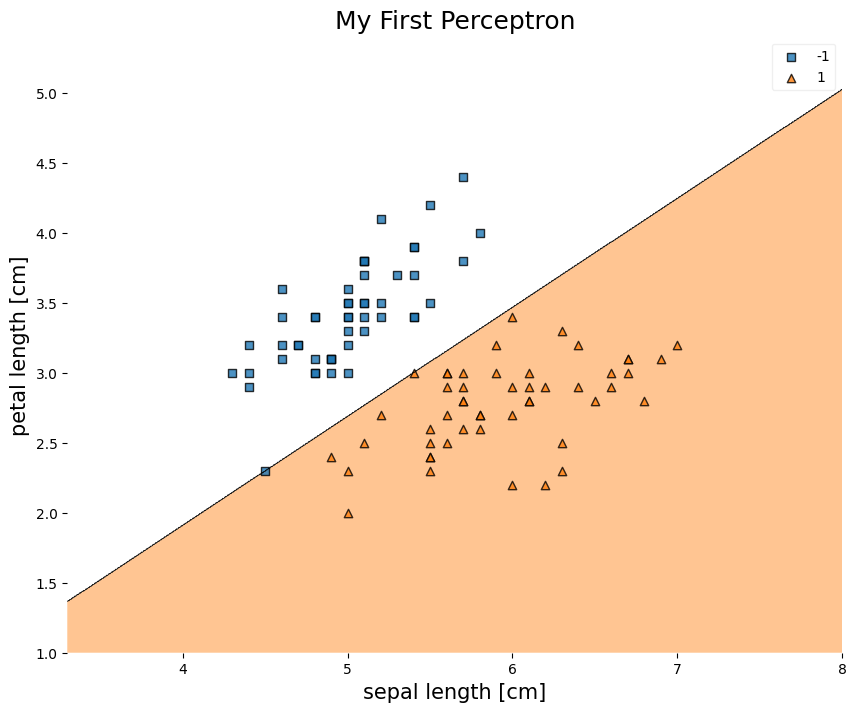

In [121]:
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()

In [336]:
weights

array([[-0.35344034],
       [ 1.11782379]])

In [341]:
print(weights.reshape(-1))

[-0.35344034  1.11782379]


In [317]:
weights = np.zeros((2,1))  # including bias as first column
learning_rate = 0.01
for epoch in range(10000):
    y_pred = x @ weights
    error = y_pred - y
    weights -= learning_rate * (x.T @ error) / len(y)
    # for i in range(x.shape[0]):
    #     xi = x[i].reshape(1, -1)   # shape (1,2)
    #     yi = y[i]                   # scalar
    #     y_pred = xi @ weights       # predicted value
    #     error = y_pred - yi  
    #     weights -= learning_rate * xi.T * error

weights

array([[-0.35294118],
       [ 1.11764706]])

In [537]:
"""
    Perceptron algorithms (NumPy)

    This module implements the single-layer and multilayer perceptron 

    Functions
    ---------
    

    Classes
    ---------
   
"""

# TODO: finish above!

__all__ = [
    'Perceptron',
]

import numpy as np
import pandas as pd
from typing import *
import warnings
from rice_ml.preprocess.datatype import *
from rice_ml.preprocess.split import _random_number
from rice_ml.supervised_learning.distances import _ensure_numeric

ArrayLike = Union[np.ndarray, Sequence[float], Sequence[Sequence[float]], pd.DataFrame, pd.Series]


def _validate_parameters(learning_rate: Optional[float],
                         epochs: Optional[int],
                         ) -> None:

    # TODO: add docstrings, potentially add functionality for collecting/graphing error counts

    if not isinstance(learning_rate, (int, float)):
        raise TypeError('Learning rate must be a float')
    if learning_rate <= 0:
        warnings.warn(f"For model to learn properly, learning rate should be greater than zero", UserWarning)
    if not isinstance(epochs, int):
        raise TypeError('Maximum epochs must be a float')
    if epochs <= 0:
        raise ValueError('Maximum epochs must be greater than zero')
    

def _validate_arrays_perceptron(data_array: Optional[ArrayLike] = None,
                              target_vector: Optional[ArrayLike] = None
                              ) -> Union[np.ndarray, Tuple[np.ndarray, np.ndarray]]:

    # TODO: add docstrings

    if data_array is not None:
        array = _2D_numeric(data_array, 'data_array')

        if np.isnan(array).any():
            raise ValueError('Data array contains missing data (NaN values)')

    if target_vector is not None:
        target_vector = np.array(target_vector)
        if target_vector.ndim == 2 and (target_vector.shape[1] == 1 or target_vector.shape[0] == 1):
            vector = target_vector.reshape(-1)
            vector = _1D_vectorized(vector, 'target_vector')
        else:
            vector = _1D_vectorized(target_vector, 'target_vector')
        if np.isnan(vector).any():
            raise ValueError('Target vector contains missing data (NaN values)')

    if data_array is not None and target_vector is not None:
        _shape_match(array, vector)
        return array, vector
    elif data_array is not None:
        return array
    elif target_vector is not None:
        return vector


def _sigmoid(z):
    
    # TODO: add unit tests?

    return 1.0/(1.0 + np.exp(-z))

def derivative_sigmoid(z):
    return _sigmoid(z) * (1.0 - _sigmoid(z))
    

class multilayer_Perceptron():

    def __init__(self,
                  layers: ArrayLike,
                  epochs: int = 1000,
                  learning_rate: float = 0.01
                 ) -> None:

        _validate_parameters(learning_rate = learning_rate, epochs = epochs)
        
        layer_array = _ensure_numeric(layers)

        self.layers = layers
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.coef_: Optional[list] = None
        self.bias_: Optional[list] = None
        self.class_mapping_: Optional[dict] = None

    def _weight_initialization(self, random_state: Optional[int] = None) -> Tuple[list, list]:
        layers = self.layers
        weights = []
        bias = []
        rng = _random_number(random_state)
        for i in range(1, len(layers)):
            layer_weight = rng.standard_normal((layers[i - 1], layers[i]))
            layer_bias = np.zeros(layers[i]) # rng.standard_normal
            weights.append(layer_weight)
            bias.append(layer_bias)
        
        return weights, bias
    
    def _forward_layer(self, training_array: np.ndarray, weights: list, bias: list) -> Tuple[list, list]:
        
        train_array = _validate_arrays_perceptron(training_array)

        z = []
        a = [train_array]
        for i in range(len(weights)):
            z_layer = np.matmul(a[-1], weights[i]) + bias[i]
            z.append(z_layer)
            a_layer = _sigmoid(z_layer)
            a.append(a_layer)
            
        return z, a

    def _back_propagation(self, z: list, a: list, weights: list, training_targets: np.ndarray) -> Tuple[list, list]:

        train_targets = _validate_arrays_perceptron(training_targets) # TODO: account for multiple classes!
        
        L = len(self.layers) - 1
        learning_rate = self.learning_rate
        delta = dict()
        delta[L] = (a[-1] - train_targets) * derivative_sigmoid(z[-1])
        d_weights = []
        d_bias = []

        for i in range(L - 1, 0, -1):
            delta[i] = (np.matmul(delta[i + 1], weights[i].T)) * derivative_sigmoid(z[i - 1])
    
        for j in range(1, L + 1):
            d_weights_layer = learning_rate * np.matmul(a[j - 1].T, delta[j])
            d_bias_layer = learning_rate * np.mean(delta[j], axis = 0)
            d_weights.append(d_weights_layer)
            d_bias.append(d_bias_layer)

        return d_weights, d_bias

    def _weight_update(self, weights: list, bias: list, d_weights: list, d_bias: list) -> Tuple[list, list]:
        
        for i in range(len(weights)):
                weights[i] -= d_weights[i]
                bias[i] -= d_bias[i]

        return weights, bias

    def fit(self, training_array: np.ndarray, training_targets: np.ndarray, random_state: Optional[int] = None) -> 'multilayer_Perceptron':
        
        train_array = _validate_arrays_perceptron(training_array)
        train_targets = _validate_arrays_perceptron(training_targets)

        weights, bias = self._weight_initialization(random_state = random_state)

        for _ in range(self.epochs):
            z, a = self._forward_layer(train_array, weights, bias)
            d_weights, d_bias = self._back_propagation(z, a, weights, train_targets)
            weights, bias = self._weight_update(weights, bias, d_weights, d_bias)

        self.coef_ = weights
        self.bias_ = bias

        return self
    
    def _verify_fit(self) -> Tuple[np.ndarray, np.ndarray]:
        if self.coef_ is None or self.bias_ is None:
            raise RuntimeError("Model is not fitted; call fit(training_array, training_targets)")

        return self
    
    def predict(self, testing_array: np.ndarray):
        
        # TODO: doctrings/comments

        self._verify_fit()

        test_array = _validate_arrays_perceptron(testing_array)
        
        coef_array = self.coef_
        # coef_array = _1D_vectorized(self.coef_) # TODO: fix this!

        if test_array.shape[1] != self.coef_[0].shape[0]:
            raise ValueError('Test array must have the same number of input features as coefficients')
        
        bias = self.bias_

        z, a = self._forward_layer(testing_array, self.coef_, self.bias_)

        prediction = a[-1]

        predicted_labels = np.where(prediction > 0.5, 1, 0)

        return prediction, predicted_labels

weights = list of length L - 1 (L is number of layers, L - 1 is number of layers not including output) - indexed from 0 to L - 2
- each entry in weights: array of dimension (number of neurons in next layer x number of neurons in past layer)
biases = list of length L - 1
- each entry in biases: vector of dimension (number of neurons in next layer x 1)
activation = list of length L (with first entry just the train array, so L - 1 meaningful entries)
- each entry in activation: array of dimension (number of samples, number of neurons in layer before one being calculated for)
z = list of length L - 1
- each entry in z: array of dimension (number of samples, number of neurons in layer being calculated for (off by 1 index from activation))

In [548]:
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
X_test = X_train.copy() # Use the same inputs for testing

Y_train = np.array([
    [1, 0],  # Input (0, 0) -> Class 0
    [1, 0],  # Input (0, 1) -> Class 0
    [1, 0],  # Input (1, 0) -> Class 0
    [0, 1],  # Input (1, 1) -> Class 1
])
# Model setup
# Layers: [2 Input, 2 Hidden, 1 Output] - The same architecture is fine.
model = multilayer_Perceptron(layers=[2, 2, 2], epochs=5000, learning_rate=0.1) 

# Train the model
model.fit(X_train, Y_train)

# Make predictions
prediction, predictions = model.predict(X_test)

print(prediction)
print(predictions)


[[9.99132972e-01 8.76348496e-04]
 [9.38306166e-01 6.33514452e-02]
 [9.36380644e-01 6.23814358e-02]
 [1.26031855e-01 8.73582736e-01]]
[[1 0]
 [1 0]
 [1 0]
 [0 1]]


In [441]:
layers = [3, 2, 2, 1]

# Create an MLP instance
mlp = multilayer_Perceptron(layers, learning_rate=0.1, epochs=1000)

# Toy dataset (X: 4 samples, 2 features; y: binary target)
X = np.array([[0, 0, 0],
              [0, 1, 0],
              [1, 0, 1],
              [1, 1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Fit the model to the data
mlp.fit(X, y)

[array([[-1.1244749 , -1.11475602],
       [-0.15569741,  0.0827548 ],
       [ 0.73760329, -0.093025  ]]), array([[-0.57136956,  0.72300382],
       [-1.31929255,  0.63363937]]), array([[ 0.50434387],
       [-0.40621188]])] [array([-0.50024246,  0.0590798 ]), array([ 1.1589291, -1.6235606]), array([-1.10884683])]
[array([[-1.1244749 , -1.11475602],
       [-0.15569741,  0.0827548 ],
       [ 0.73760329, -0.093025  ]]), array([[-0.57136956,  0.72300382],
       [-1.31929255,  0.63363937]]), array([[ 0.50434387],
       [-0.40621188]])]


In [553]:
data_array = np.array([
    [1, 2],
    [2, 3],
    [4, 5]
])

observation_number = data_array.shape[0]
means = np.mean(data_array, axis = 0)

covariance_matrix = np.dot((data_array - means).T, (data_array - means)) / (observation_number - 1)
print(covariance_matrix)
cov_numpy = np.cov(data_array, rowvar=False)
print(cov_numpy)

np.linalg.eigh(covariance_matrix)

[[2.33333333 2.33333333]
 [2.33333333 2.33333333]]
[[2.33333333 2.33333333]
 [2.33333333 2.33333333]]


EighResult(eigenvalues=array([0.        , 4.66666667]), eigenvectors=array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]]))

In [585]:

def z_score_standardize(data_array: ArrayLike, return_params: bool = False, ddof: int = 0) -> Union[np.ndarray, Tuple[np.ndarray, dict]]:
    
    # TODO: add type hints/docstrings/examples

    array = _2D_numeric(data_array)

    if not isinstance(ddof, int):
        raise TypeError(f"ddof parameter must be an integer, got {type(ddof).__name__}")
    
    if not isinstance(return_params, bool):
        raise TypeError(f"return_params must be a boolean, got {type(return_params).__name__}")
    
    if ddof < 0:
        raise ValueError(f"ddof parameter must be greater than or equal to zero")

    columnwise_mean = array.mean(axis = 0)
    scale = array.std(axis = 0, ddof = ddof)
    scale[scale == 0.0] = 1.0
    standardized_array = (array - columnwise_mean) / scale

    if return_params:
        return standardized_array, {'mean': columnwise_mean, 'scale': scale}

    return standardized_array


class pca():
    
    def __init__(self,
                 n_components: int) -> None:
        
        if not isinstance(n_components, int):
            raise TypeError('Number of retained components must be an integer')
        if n_components <= 0:
            raise ValueError('Number of retained components must be greater than zero')

        self.n_components = n_components
        self.components: Optional[np.ndarray] = None
        self.eigenvalues: Optional[np.ndarray] = None
        self.variance: Optional[np.ndarray] = None

        # TODO: add a check here that n_components does not exceed number of features
    
    def fit(self, data_input_array: ArrayLike) -> np.ndarray:

        data_array = z_score_standardize(data_input_array)

        if self.n_components > data_array.shape[1]:
            raise ValueError('Number of retained components cannot exceed number of features')

        observation_number = data_array.shape[0]
        means = np.mean(data_array, axis = 0)

        covariance_matrix = np.dot((data_array - means).T, (data_array - means)) / (observation_number - 1)

        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        self.eigenvalues = sorted_eigenvalues[:self.n_components]
        self.variance = sorted_eigenvalues[:self.n_components]/(np.sum(eigenvalues))
        self.components = sorted_eigenvectors[:, :self.n_components]

        return self

    def _verify_fit(self) -> 'pca':
        if self.components is None or self.variance is None:
            raise RuntimeError("Model is not fitted; call fit(data_input_array)")

        return self

    def transform(self, data_input_array: ArrayLike) -> np.ndarray:

        self._verify_fit()
        data_array = z_score_standardize(data_input_array)
        transformed_data = np.dot(data_array, self.components)

        return transformed_data


In [586]:
X = np.array([
    [2.5, 2.4, 0.5],
    [0.5, 0.7, 2.2],
    [2.2, 2.9, 2.9],
    [1.9, 2.2, 1.5],
    [3.1, 3.0, 3.3]
])

pca_new = pca(n_components = 2)

pca_new.fit(X)
print(pca_new.components)
print(pca_new.variance)

pca_new.transform(X)

[[-0.67397595 -0.25169344]
 [-0.68991106 -0.12173674]
 [-0.26415742  0.96012009]]
[0.67185508 0.31058257]


array([[-0.07448672, -1.67301084],
       [ 2.45265516,  0.78952027],
       [-0.89213185,  0.64291825],
       [ 0.2954202 , -0.50985255],
       [-1.78145679,  0.75042487]])

In [ ]:

def _validate_parameters(max_depth: Optional[int], min_samples_split: Optional[int]) -> None:

    # TODO: type hints, docstrings

    if max_depth is not None and not isinstance(max_depth, int):
        raise TypeError('Maximum depth must be an integer')
    if max_depth is not None and max_depth <= 0:
        raise ValueError('Maximum depth must be greater than zero')
    if not isinstance(min_samples_split, int):
        raise TypeError('Minimum samples required to split node must be an integer')
    if min_samples_split <= 0:
        raise TypeError('Minimum samples required to split node must be greater than zero')
    
def _validate_parameters_node(feature_index: Optional[int], 
                              threshold_value: Optional[float], 
                              left: Optional["Node"] = None, 
                              right: Optional["Node"] = None) -> None:

    # TODO: type hints, docstrings

    if feature_index is not None and not isinstance(feature_index, int):
        raise TypeError('Feature index must be an integer')
    if feature_index is not None and feature_index < 0:
        raise ValueError('Feature index must be greater than or equal to zero')
    if threshold_value is not None and not isinstance(threshold_value, (float, int)):
        raise TypeError('Threshold value must be a float')
    if left is not None and not isinstance(left, Node):
        raise TypeError('Left node must be an instance of the Node class')
    if right is not None and not isinstance(right, Node):
        raise TypeError('Right node must be an instance of the Node class')

def _entropy(train_targets: np.ndarray):

    train_targets = _1D_vectorized(train_targets)

    _, counts = np.unique(train_targets, return_counts = True)
    probabilities = counts / np.sum(counts)
    probabilities_filtered = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities_filtered * np.log2(probabilities_filtered))

    return entropy


class Node():

    def __init__(self,
                 feature_index: Optional[int] = None,
                 threshold_value: Optional[float] = None,
                 left: "Node" = None,
                 right: "Node" = None,
                 value: Optional[Any] = None) -> None:
        
        _validate_parameters_node(feature_index, threshold_value, left, right)

        self.feature_index = feature_index
        self.threshold = threshold_value
        self.left = left
        self.right = right
        self.value: Optional[Any] = value

    def is_leaf(self) -> bool:
        return self.value is not None

class decision_tree():

    def __init__(self,
                 max_depth: Optional[int] = None,
                 min_samples_split: Optional[int] = 2) -> None:
        
        _validate_parameters(max_depth, min_samples_split)

        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree: Optional[Node] = None
        self._class_mappings: Optional[dict] = None
        self._reverse_class_mappings: Optional[dict] = None
        self._n_features: Optional[int] = None

    def _information_gain(self,
                          parent_class: np.ndarray,
                          left_class: np.ndarray,
                          right_class: np.ndarray) -> ...:
        
        parent_entropy = _entropy(parent_class)
        left_entropy = _entropy(left_class)
        right_entropy = _entropy(right_class)

        if len(parent_class) != len(left_class) + len(right_class):
            raise ValueError('Summed number of split samples must equal total number of samples')
        
        left_weight = len(left_class) / len(parent_class)
        right_weight = len(right_class) / len(parent_class)

        final_gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)

        return final_gain
    
    def _best_split(self,
                    training_array: ArrayLike,
                    training_targets: ArrayLike) -> ...:
        
        train_array = _2D_numeric(training_array)
        train_targets = _1D_vectorized(training_targets)

        _, n_features = train_array.shape

        best_gain = -np.inf
        best_feature = None
        best_threshold = None

        for feature in range(n_features):
            possible_thresholds = np.unique(train_array[:, feature])
            for threshold in possible_thresholds:
                left_indices = train_array[:, feature] <= threshold
                right_indices = train_array[:, feature] > threshold
                
                left_classes = train_targets[left_indices]
                right_classes = train_targets[right_indices]

                if len(left_classes) == 0 or len(right_classes) == 0:
                    continue
                
                gain = self._information_gain(train_targets, left_classes, right_classes)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold
                
    def _leaf_value(self, training_targets: np.ndarray) -> Union[int, float, str]:

        train_targets = _1D_vectorized(training_targets)
        classes, counts = np.unique(train_targets, return_counts = True)
        classification = classes[np.argmax(counts)]

        return classification
    
    def _build_tree(self, training_array: ArrayLike, training_targets: ArrayLike, depth: int) -> Node:

        train_array = _2D_numeric(training_array)
        train_targets = _1D_vectorized(training_targets)

        n_samples, n_features = train_array.shape

        if n_samples < self.min_samples_split:
            return Node(value = self._leaf_value(train_targets))
        if self.max_depth is not None and self.max_depth <= depth:
            return Node(value = self._leaf_value(train_targets))
        if len(np.unique(train_targets)) == 1:
            return Node(value = self._leaf_value(train_targets))
        
        best_feature, best_threshold = self._best_split(train_array, train_targets)

        left_indices = train_array[:, best_feature] <= best_threshold
        right_indices = train_array[:, best_feature] > best_threshold
        
        left_classes = train_targets[left_indices]
        right_classes = train_targets[right_indices]

        left_child = self._build_tree(train_array[left_indices, :], left_classes, depth + 1)
        right_child = self._build_tree(train_array[right_indices, :], right_classes, depth + 1)

        return Node(feature_index = best_feature, threshold_value = best_threshold, left = left_child, right = right_child)
    
    def fit(self, training_array: ArrayLike, training_targets: ArrayLike) -> "decision_tree":
        
        unique_classes = list(dict.fromkeys(training_targets))
        self._class_mappings = {cls: i for i, cls in enumerate(unique_classes)}

        self._reverse_class_mappings = {
                                    i: (cls.item() if isinstance(cls, np.generic) else cls)
                                    for cls, i in self._class_mappings.items()
                                }
        
        train_targets = np.array([self._class_mappings[item] for item in training_targets])
        
        train_array = _2D_numeric(training_array)
        self._n_features = train_array.shape[1]

        final_tree = self._build_tree(train_array, train_targets, 0)
        self.tree = final_tree

        return self
    
    def _verify_fit(self) -> "decision_tree":
        if self.tree is None:
            raise RuntimeError("Model is not fitted; call fit(training_array, training_targets)")

        return self
    
    def predict(self, testing_array: ArrayLike) -> np.ndarray:

        self._verify_fit()

        test_array = _2D_numeric(testing_array)

        if test_array.shape[1] != self._n_features:
            raise ValueError("Number of features in testing data must match number of features in training data")
        
        # TODO: add something to test that test_array has the same number of features

        prediction_array = np.full((test_array.shape[0],), np.nan, dtype = object)
        for sample in range(test_array.shape[0]):
            prediction = self._predict_recursive(test_array[sample, :], self.tree)
            prediction_array[sample] = prediction
        
        if any(value is np.nan or value is None for value in prediction_array):
            raise ValueError("Predictions were not made for all samples")
        
        predictions = np.array([self._reverse_class_mappings[p] for p in prediction_array], dtype=object)
        
        return predictions

    def _predict_recursive(self, testing_row: np.ndarray, node: Node) -> Union[int, float, str]:
        
        if node.value is not None:
            return node.value
        
        if testing_row[node.feature_index] <= node.threshold:
            return self._predict_recursive(testing_row, node.left)
        else:
            return self._predict_recursive(testing_row, node.right)
    
    def print_tree(self, node: Optional[Node] = None, depth: int = 0) -> None:
        
        if node is None:
            self._verify_fit()
            node = self.tree

        if node.is_leaf():
            print("\t" * depth + f"Predict: {node.value}")
        else:
            print("\t" * depth + f"Feature {node.feature_index} <= {node.threshold}")
            self.print_tree(node.left, depth + 1)
            self.print_tree(node.right, depth + 1)


In [746]:
X_train = np.array([
    [0, 3, 0],  # Red, small, smooth
    [0, 5, 1],  # Red, medium, rough
    [1, 4, 0],  # Green, medium, smooth
    [1, 6, 1],  # Green, large, rough
    [2, 2, 0],  # Yellow, small, smooth
    [2, 7, 1],  # Yellow, large, rough
    [0, 4, 0],
    [1, 5, 1],
    [2, 3, 0],
    [1, 7, 1]
])

# Target values: Edible=1, Not=0
y_train = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

X_test = np.array([
    [0, 2, 0],  # Red, very small, smooth
    [1, 6, 0],  # Green, large, smooth
    [2, 5, 1],  # Yellow, medium-large, rough
    [0, 6, 1],  # Red, large, rough
    [1, 3, 0]   # Green, small, smooth
])

decision = decision_tree(max_depth = 1)

decision.fit(X_train, y_train)

predict = decision.predict(X_test)

print(predict)

decision.print_tree()

[0 1 1 0 1]
Feature 0 <= 0.0
	Predict: 0
	Predict: 1


In [791]:

class regression_tree():

    def __init__(self,
                 max_depth: Optional[int] = None,
                 min_samples_split: Optional[int] = 2) -> None:
        
        _validate_parameters(max_depth, min_samples_split)

        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree: Optional[Node] = None
        self._n_features: Optional[int] = None

    def _variance_reduction(self,
                          parent_class: np.ndarray,
                          left_class: np.ndarray,
                          right_class: np.ndarray) -> float:
        
        parent_variance = np.var(parent_class)
        left_variance = np.var(left_class)
        right_variance = np.var(right_class)

        if len(parent_class) != len(left_class) + len(right_class):
            raise ValueError('Summed number of split samples must equal total number of samples')
        
        left_weight = len(left_class) / len(parent_class)
        right_weight = len(right_class) / len(parent_class)

        final_var_reduction = parent_variance - (left_weight * left_variance + right_weight * right_variance)

        return final_var_reduction
    
    def _best_split(self,
                    training_array: ArrayLike,
                    training_targets: ArrayLike) -> Tuple[int, float]:
        
        train_array = _2D_numeric(training_array)
        train_targets = _ensure_numeric(training_targets)

        _, n_features = train_array.shape

        best_var = -np.inf
        best_feature = None
        best_threshold = None

        for feature in range(n_features):
            feature_values = np.sort(np.unique(train_array[:, feature]))
            possible_thresholds = (feature_values[:-1] + feature_values[1:]) / 2
            for threshold in possible_thresholds:
                left_indices = train_array[:, feature] <= threshold
                right_indices = train_array[:, feature] > threshold
                
                left_classes = train_targets[left_indices]
                right_classes = train_targets[right_indices]

                if len(left_classes) == 0 or len(right_classes) == 0:
                    continue
                
                var = self._variance_reduction(train_targets, left_classes, right_classes)

                if var > best_var:
                    best_var = var
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold
                
    def _leaf_value(self, training_targets: np.ndarray) -> Union[int, float, str]:

        train_targets = _ensure_numeric(training_targets)
        regression = np.mean(train_targets)

        return regression
    
    def _build_tree(self, training_array: ArrayLike, training_targets: ArrayLike, depth: int) -> Node:

        train_array = _2D_numeric(training_array)
        train_targets = _ensure_numeric(training_targets)

        n_samples, n_features = train_array.shape

        if n_samples < self.min_samples_split:
            return Node(value = self._leaf_value(train_targets))
        if self.max_depth is not None and self.max_depth <= depth:
            return Node(value = self._leaf_value(train_targets))
        if np.var(train_targets) == 0:
            return Node(value = self._leaf_value(train_targets))
        
        best_feature, best_threshold = self._best_split(train_array, train_targets)

        left_indices = train_array[:, best_feature] <= best_threshold
        right_indices = train_array[:, best_feature] > best_threshold
        
        left_classes = train_targets[left_indices]
        right_classes = train_targets[right_indices]

        left_child = self._build_tree(train_array[left_indices, :], left_classes, depth + 1)
        right_child = self._build_tree(train_array[right_indices, :], right_classes, depth + 1)

        return Node(feature_index = best_feature, threshold_value = best_threshold, left = left_child, right = right_child)
    
    def fit(self, training_array: ArrayLike, training_targets: ArrayLike) -> "regression_tree":
        
        train_targets = _ensure_numeric(training_targets)
        train_array = _2D_numeric(training_array)
        self._n_features = train_array.shape[1]

        final_tree = self._build_tree(train_array, train_targets, 0)
        self.tree = final_tree

        return self
    
    def _verify_fit(self) -> "regression_tree":
        if self.tree is None:
            raise RuntimeError("Model is not fitted; call fit(training_array, training_targets)")

        return self
    
    def predict(self, testing_array: ArrayLike) -> np.ndarray:

        self._verify_fit()

        test_array = _2D_numeric(testing_array)

        if test_array.shape[1] != self._n_features:
            raise ValueError("Number of features in testing data must match number of features in training data")

        prediction_array = np.full((test_array.shape[0],), np.nan, dtype = float)
        for sample in range(test_array.shape[0]):
            prediction = self._predict_recursive(test_array[sample, :], self.tree)
            prediction_array[sample] = prediction
        
        if any(value is np.nan or value is None for value in prediction_array):
            raise ValueError("Predictions were not made for all samples")
        
        return prediction_array

    def _predict_recursive(self, testing_row: np.ndarray, node: Node) -> Union[int, float, str]:
        
        if node.value is not None:
            return node.value
        
        if testing_row[node.feature_index] <= node.threshold:
            return self._predict_recursive(testing_row, node.left)
        else:
            return self._predict_recursive(testing_row, node.right)
    
    def print_tree(self, node: Optional[Node] = None, depth: int = 0) -> None:
        
        if node is None:
            self._verify_fit()
            node = self.tree

        if node.is_leaf():
            print("\t" * depth + f"Predict: {node.value}")
        else:
            print("\t" * depth + f"Feature {node.feature_index} <= {node.threshold}")
            self.print_tree(node.left, depth + 1)
            self.print_tree(node.right, depth + 1)

In [795]:
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([2.0, 4.0, 6.0, 8.0, 10.0])  # Linear relationship: y = 2*x

# Testing data
X_test = np.array([[1.5], [3.5], [5]])

regression = regression_tree(max_depth = 2, min_samples_split=1)
regression.fit(X_train, y_train)
print(regression.predict(X_test))
regression.print_tree()

best_feature, best_threshold = regression._best_split(X_train, y_train)
print(best_feature, best_threshold)

[2. 6. 9.]
Feature 0 <= 2.5
	Feature 0 <= 1.5
		Predict: 2.0
		Predict: 4.0
	Feature 0 <= 3.5
		Predict: 6.0
		Predict: 9.0
0 2.5


In [800]:
X_train = np.array([
    [1, 2],
    [1, 4],
    [2, 2],
    [2, 4]
])
y_train = np.array([3.0, 5.0, 5.0, 7.0])

tree = regression_tree(max_depth=1, min_samples_split=2)
tree.fit(X_train, y_train)
X_test = np.array([[1,3],[2,3]])
y_pred = tree.predict(X_test)
print(y_pred)  # should be approx [4.0, 6.0]
tree.print_tree()

[4. 6.]
Feature 0 <= 1.5
	Predict: 4.0
	Predict: 6.0


In [786]:
# Training data (2 features)
X_train = np.array([
    [1, 2],
    [1, 4],
    [2, 2],
    [2, 4]
])
y_train = np.array([3.0, 5.0, 5.0, 7.0])  # roughly: y = x1 + x2

# Testing data
X_test = np.array([
    [1, 3],
    [2, 3]
])

# Expected outcomes (depending on splits):
#   1,3 → leaf covering [1,2], [1,4] → mean = (3+5)/2 = 4
#   2,3 → leaf covering [2,2], [2,4] → mean = (5+7)/2 = 6
expected_y = np.array([4.0, 6.0])

tree = regression_tree(max_depth=None, min_samples_split=1)
tree.fit(X_train, y_train)
X_test = np.array([[1,3],[2,3]])
y_pred = tree.predict(X_test)
print(y_pred)  # should be approx [4.0, 6.0]
tree.print_tree()

[3. 5.]
Feature 0 <= 1.0
	Feature 1 <= 3.0
		Predict: 3.0
		Predict: 5.0
	Feature 1 <= 3.0
		Predict: 5.0
		Predict: 7.0


In [ ]:
X_train = np.array([[1], [1], [2], [2]])
y_train = np.array([5.0, 5.0, 10.0, 10.0])

X_test = np.array([[1], [2], [1.5]])

# Expected outcomes:
#   1 → leaf covering [1,1] → mean = 5
#   2 → leaf covering [2,2] → mean = 10
#   1.5 → maybe split [1,2] → mean = (5+10)/2 = 7.5
expected_y = np.array([5.0, 10.0, 7.5])
